In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
def read_fasta_to_dataframe(file_path):
    sequences = []

    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i % 2 == 1:  # Every second line contains the sequence
                sequences.append(line.strip())

    # Create a DataFrame from the list of sequences
    df = pd.DataFrame(sequences, columns=['Sequence'])

    return df

In [3]:
df_pel = read_fasta_to_dataframe("../len_fil/Pel_fil_1.fasta")
df_sup = read_fasta_to_dataframe("../len_fil/Sup_fil_1.fasta")
df_ref = read_fasta_to_dataframe("../len_fil/Ref_fil_1.fasta")

In [4]:
def find_A_G(df):
    data = []
    
    for seq in df["Sequence"]:
        # Find all non-overlapping stretches
        A_5_matches = re.findall(r"A{5,}", seq)
        G_5_matches = re.findall(r"G{5,}", seq)
        A_7_matches = re.findall(r"A{7,}", seq)
        G_7_matches = re.findall(r"G{7,}", seq)

        data.append({
            "Sequence": seq,
            "5A_count": len(A_5_matches),
            "5G_count": len(G_5_matches),
            "7A_count": len(A_7_matches),
            "7G_count": len(G_7_matches)
        })

    
    new_df = pd.DataFrame(data)
    return new_df

In [5]:
df_pel_res2 = find_A_G(df_pel)
df_sup_res2 = find_A_G(df_sup)
df_ref_res2 = find_A_G(df_ref)

In [6]:
df_repeat_counts = pd.DataFrame()
df_repeat_counts["5A"] = [sum(df_pel_res2["5A_count"]), sum(df_sup_res2["5A_count"]), sum(df_ref_res2["5A_count"])]
df_repeat_counts["7A"] = [sum(df_pel_res2["7A_count"]), sum(df_sup_res2["7A_count"]), sum(df_ref_res2["7A_count"])]
df_repeat_counts["5G"] = [sum(df_pel_res2["5G_count"]), sum(df_sup_res2["5G_count"]), sum(df_ref_res2["5G_count"])]
df_repeat_counts["7G"] = [sum(df_pel_res2["7G_count"]), sum(df_sup_res2["7G_count"]), sum(df_ref_res2["7G_count"])]
df_repeat_counts.index = ["Droplet", "Supernatant", "Reference"]

In [7]:
row_counts = pd.Series(
    [len(df_pel_res2)/100, len(df_sup_res2)/100, len(df_ref_res2)/100],
    index=["Droplet", "Supernatant", "Reference"]
)

df_repeat_perc = df_repeat_counts.div(row_counts, axis=0)

df_repeat_perc

,5A,7A,5G,7G
Droplet,2.558939,0.296247,5.056958,0.512435
Supernatant,0.954303,0.022725,2.387555,0.163180
Reference,1.222270,0.057868,2.816985,0.224536


In [8]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'

def plot_repeat_fractions(df_repeat_frac):
    titles = ["≥5 A's", "≥7 A's", "≥5 G's", "≥7 G's"]
    colors = ["#CE70F2", "#6daaff", "red"]  # One color per sample type (e.g. pellet/sup/input)
    sample_labels = df_repeat_frac.index.tolist()  # e.g., ["Pellet", "Supernatant", "Input"]
    num_groups = len(titles)
    num_bars_per_group = len(sample_labels)

    x = np.arange(num_groups)  # one x-position per repeat type
    width = 0.2  # width of each individual bar

    fig, ax = plt.subplots(figsize=(9/2.54, 6.5/2.54))

    for i, sample in enumerate(sample_labels):
        values = [df_repeat_frac.loc[sample, col] for col in df_repeat_frac.columns]
        ax.bar(x + i * width, values, width, label=sample, color=colors[i])

    ax.set_ylabel("Frequency / %", weight="bold", fontsize=10)
    ax.set_xticks(x + width * (num_bars_per_group - 1) / 2)
    ax.set_xticklabels(titles)

    # Add legend below the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(sample_labels), frameon=False)

    plt.tight_layout()
    #plt.savefig("consecutive_A_G.pdf", bbox_inches="tight")
    plt.show()

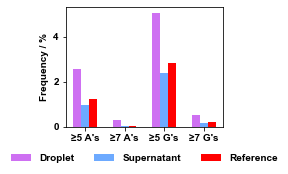

In [9]:
plot_repeat_fractions(df_repeat_perc)

In [10]:
df_drop_sup = df_repeat_perc.drop("Reference")

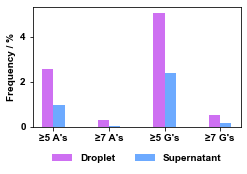

In [11]:
plot_repeat_fractions(df_drop_sup)

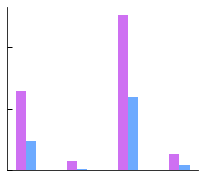

In [12]:
def plot_repeat_fractions_keynote(df_repeat_frac):
    titles = ["≥5 A's", "≥7 A's", "≥5 G's", "≥7 G's"]
    colors = ["#CE70F2", "#6daaff", "red"]  # One color per sample type (e.g. pellet/sup/input)
    sample_labels = df_repeat_frac.index.tolist()  # e.g., ["Pellet", "Supernatant", "Input"]
    num_groups = len(titles)
    num_bars_per_group = len(sample_labels)

    x = np.arange(num_groups)  # one x-position per repeat type
    width = 0.2  # width of each individual bar

    fig, ax = plt.subplots(figsize=(7.5/2.54, 6.5/2.54))

    for i, sample in enumerate(sample_labels):
        values = [df_repeat_frac.loc[sample, col] for col in df_repeat_frac.columns]
        ax.bar(x + i * width, values, width, label=sample, color=colors[i])

    #ax.set_ylabel("Frequency / %", weight="bold", fontsize=10)
    ax.set_xticks(x + width * (num_bars_per_group - 1) / 2)
    #ax.set_xticklabels(titles)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.tick_params(axis="y", direction="in", length=5, width=1)
    plt.tick_params(axis="x", length=0)
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.yticks([0, 2, 4])

    # Add legend below the plot
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(sample_labels), frameon=False)

    plt.tight_layout()
    plt.savefig("Figure_2D_keynote.pdf", bbox_inches="tight")
    plt.show()

plot_repeat_fractions_keynote(df_drop_sup)